# **Advanced Machine Learning** 

## **Assignment 2: Building Convolution Networks**

In this assignment, you will examine the relationship between training samples and the choice
of training your model from scratch, versus using a pretrained convnet. Specifically, answer the
following questions:
1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation
sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce
overfitting and improve performance in developing a network that you train from scratch. What
performance did you achieve?

2. Increase your training sample size. You may pick any amount. Keep the validation and test
samples the same as above. Optimize your network (again training from scratch). What
performance did you achieve?

3. Now change your training sample so that you achieve better performance than those from Steps
1 and 2. This sample size may be larger, or smaller than those in the previous steps. The
objective is to find the ideal training sample size to get best prediction results.

4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3
for the pretrained network may be the same or different from those using the network where
you trained from scratch. Again, use any and all optimization techniques to get best
performance

# **_Importing required packages_**


     

In [10]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Dropout

# **Training a convnet from scratch on a small dataset**

Now we are moving on to training our own ConvNet for the scratch. But rather than going with the traditional mnist data set, we will use the Cats vs dogs dataset from Kaggle.

Below we will see how to download and import data from kaggle directly into Colab, instantiate a basic neural network that we going to make form the scratch and then try to improve it as we go on.

The relevance of deep learning for small-data problems

## **Downloading the data**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kirankour11","key":"bd2fa28305f98a76bb3cbb58eb0ddc3a"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:20<00:00, 42.3MB/s]
100% 812M/812M [00:20<00:00, 41.2MB/s]


In [4]:
!unzip -qq dogs-vs-cats.zip

In [5]:
!unzip -qq train.zip

In [6]:
!unzip -qq test1.zip

**Now we are done with the downloading our data.**

### **_1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?_**

**Copying images to training, validation, and test directories**

In [7]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [11]:
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [13]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [12]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [14]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


(4, 4)
(4, 4)
(4, 4)


Displaying the shapes of the data and labels yielded by the Dataset

In [15]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


# **_Building the Convolution Network_**


## **Model 1:  4 layers, Activation- sigmoid, Optimizer- rmsprop, Loss- binary_crossentropy**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_12 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_58 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                     

Here we have made a model with just 4 conv2D layers and 4 maxpooling layers. As we can see it's not that big of a model( Compared to the ones that we see being used by Google, Facebook and other big tech companies) and we already have 991,041 parameters.

As we move on this will lead us to oe of the most common problems, Over fitting, and we will also see and use some of the techniques that will help us overcoming this issue.

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 66ms/step - loss: 0.7033 - accuracy: 0.5255 - val_loss: 0.6993 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6960 - accuracy: 0.5230 - val_loss: 0.6874 - val_accuracy: 0.5880
Epoch 3/30
63/63 [==============================] - 5s 76ms/step - loss: 0.6834 - accuracy: 0.5730 - val_loss: 0.6449 - val_accuracy: 0.6470
Epoch 4/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6422 - accuracy: 0.6375 - val_loss: 0.6188 - val_accuracy: 0.6490
Epoch 5/30
63/63 [==============================] - 4s 61ms/step - loss: 0.5994 - accuracy: 0.6850 - val_loss: 0.7579 - val_accuracy: 0.5810
Epoch 6/30
63/63 [==============================] - 5s 74ms/step - loss: 0.5795 - accuracy: 0.6990 - val_loss: 0.6712 - val_accuracy: 0.6120
Epoch 7/30
63/63 [==============================] - 4s 60ms/step - loss: 0.5409 - accuracy: 0.7290 - val_loss: 0.6230 - val_accuracy: 0.6800
Epoch 8/30
63

**Displaying curves of loss and accuracy during training**

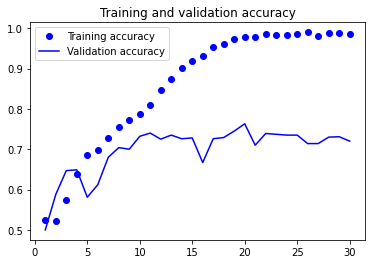

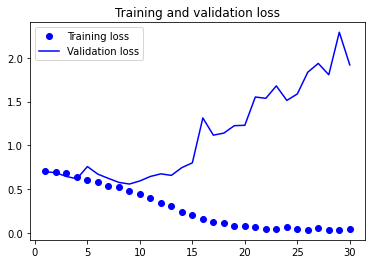

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()
     

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.6020 - accuracy: 0.6970
Test accuracy: 0.697


**_The accuracy of the model on the test set is 69.7%_**

## **Model 2:  4 layers, 16 Neurons, Activation- sigmoid, Optimizer- adam, Loss- binary_crossentropy**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                     

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 79ms/step - loss: 0.6943 - accuracy: 0.5285 - val_loss: 0.6866 - val_accuracy: 0.5080
Epoch 2/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6878 - accuracy: 0.5585 - val_loss: 0.6781 - val_accuracy: 0.5620
Epoch 3/30
63/63 [==============================] - 6s 84ms/step - loss: 0.6763 - accuracy: 0.5710 - val_loss: 0.6912 - val_accuracy: 0.5880
Epoch 4/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6503 - accuracy: 0.6320 - val_loss: 0.6747 - val_accuracy: 0.5980
Epoch 5/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6133 - accuracy: 0.6655 - val_loss: 0.6250 - val_accuracy: 0.6550
Epoch 6/30
63/63 [==============================] - 5s 79ms/step - loss: 0.5748 - accuracy: 0.7105 - val_loss: 0.6181 - val_accuracy: 0.6640
Epoch 7/30
63/63 [==============================] - 4s 62ms/step - loss: 0.5513 - accuracy: 0.7215 - val_loss: 0.5635 - val_accuracy: 0.7120
Epoch 8/30
63

**Displaying curves of loss and accuracy during training**



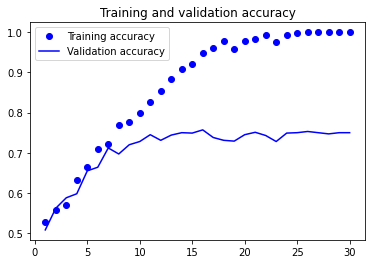

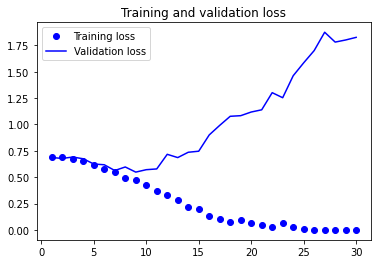

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.5950 - accuracy: 0.7000
Test accuracy: 0.700


**_The accuracy of the model on the test set is 70%_**

## **Model 3: 4 layers, Activation- sigmoid, Optimizer- adam, Loss- binary_crossentropy, Augmentation, Dropout- 0.5**

After running the above model, we can make a few deductions:

The model is training very very well on the training set, to a paoint where it is overfitting.

The validation and test accuracy are not at all improving.

So in order to improve our validation andtest accuracy and prevent overfitting, we can use 3 techniques :

a) Data Augmentation

b) Regularization

c) Dropout

Now we will use Data Augmentation to reduce the effects of Overfitting.

## **Using Data Augmentation and Dropout**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


**Define a data augmentation stage to add to an image model**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

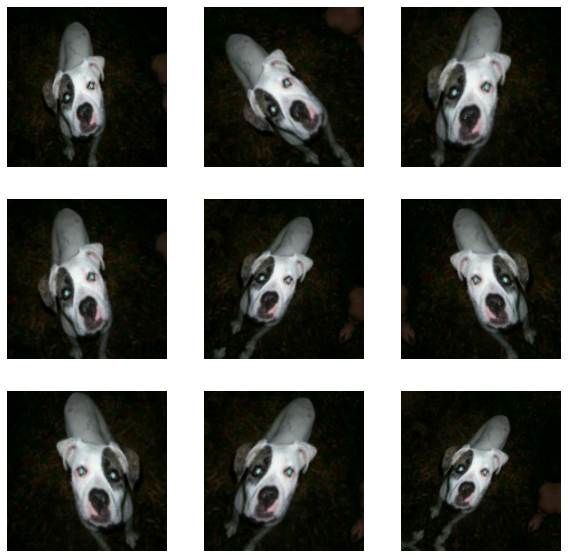

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Here we are showing a sample of 9 images that have been flipped, zoomed and rotated.

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


63/63 [==============================] - 229s 4s/step - loss: 0.6940 - accuracy: 0.5115 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 217s 3s/step - loss: 0.6931 - accuracy: 0.5085 - val_loss: 0.6904 - val_accuracy: 0.5500
Epoch 3/30
63/63 [==============================] - 214s 3s/step - loss: 0.6759 - accuracy: 0.5860 - val_loss: 0.6302 - val_accuracy: 0.6380
Epoch 4/30
63/63 [==============================] - 215s 3s/step - loss: 0.6301 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6560
Epoch 5/30
63/63 [==============================] - 213s 3s/step - loss: 0.6515 - accuracy: 0.6085 - val_loss: 0.6583 - val_accuracy: 0.6010
Epoch 6/30
63/63 [==============================] - 218s 3s/step - loss: 0.6218 - accuracy: 0.6570 - val_loss: 0.7498 - val_accuracy: 0.5830
Epoch 7/30
63/63 [==============================] - 214s 3s/step - loss: 0.5926 - accuracy: 0.6860 - val_loss: 0.5874 - val_accuracy: 0.6760
Epoch 8/30
63/63 [======

**Displaying curves of loss and accuracy during training**

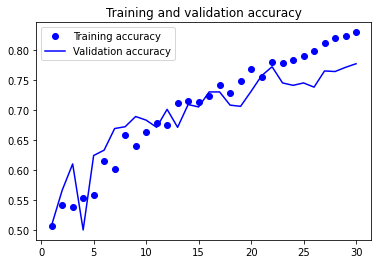

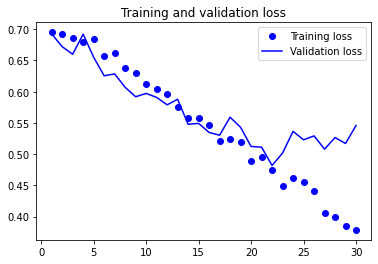

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.5498 - accuracy: 0.7360
Test accuracy: 0.736


**_The accuracy of the model on the test set is 78.80%_**

As we can see that our test accuracy has already moved up just by using data augmentation and dropout. However we do have to train the model for more epochs than usual.

Hense we can say that by using Data Augmentation, dropout and Regularization we can some what mittigate the effects of Overfitting.

## **Model 4: 4 layers, 32 Neurons, Activation- sigmoid, Optimizer- rmsprop, Loss- binary_crossentropy, Augmentation, Dropout- 0.3**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


63/63 [==============================] - 19s 225ms/step - loss: 1.8880 - accuracy: 0.4920 - val_loss: 0.7429 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 14s 220ms/step - loss: 0.7051 - accuracy: 0.4900 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 14s 221ms/step - loss: 0.6934 - accuracy: 0.4860 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/30
63/63 [==============================] - 14s 220ms/step - loss: 0.6932 - accuracy: 0.4890 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/30
63/63 [==============================] - 14s 222ms/step - loss: 0.6932 - accuracy: 0.4910 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/30
63/63 [==============================] - 14s 219ms/step - loss: 0.6932 - accuracy: 0.4910 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/30
63/63 [==============================] - 14s 221ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/30

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 33ms/step - loss: 0.6931 - accuracy: 0.5000
Test accuracy: 0.500


**_The accuracy of the model on the test set is 50%_**

### **_2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?_**

Copying images to training, validation, and test directories

In [ ]:
import os, shutil, pathlib

original_dir_2 = pathlib.Path("train")
new_base_dir_2 = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train_2", start_index=0, end_index=2000)
make_subset("validation_2", start_index=2000, end_index=2500)
make_subset("test_2", start_index=2500, end_index=3000)
     

## **Data preprocessing**

**Using image_dataset_from_directory to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train_2",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation_2",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test_2",
    image_size=(180, 180),
    batch_size=32)

Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
     

for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the Dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Now in this question, we are going to increase our training sampe size to 2000, keeping validation and test same as before.**

## **Model 5: 4 layers, 32 Neurons, Activation- sigmoid, Optimizer- adam, Loss- binary_crossentropy**

**Instantiating a small convnet for dogs vs. cats classification**


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_updated_train_size.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=25,
    validation_data=validation_dataset,
    callbacks=callbacks)
     

Epoch 1/25
125/125 [==============================] - 22s 60ms/step - loss: 0.6915 - accuracy: 0.5328 - val_loss: 0.6753 - val_accuracy: 0.5680
Epoch 2/25
125/125 [==============================] - 9s 65ms/step - loss: 0.6431 - accuracy: 0.6292 - val_loss: 0.6320 - val_accuracy: 0.6480
Epoch 3/25
125/125 [==============================] - 7s 57ms/step - loss: 0.6047 - accuracy: 0.6752 - val_loss: 0.6411 - val_accuracy: 0.6270
Epoch 4/25
125/125 [==============================] - 7s 54ms/step - loss: 0.5791 - accuracy: 0.7010 - val_loss: 0.5864 - val_accuracy: 0.7090
Epoch 5/25
125/125 [==============================] - 8s 63ms/step - loss: 0.5245 - accuracy: 0.7352 - val_loss: 0.5234 - val_accuracy: 0.7570
Epoch 6/25
125/125 [==============================] - 9s 67ms/step - loss: 0.4873 - accuracy: 0.7703 - val_loss: 0.5503 - val_accuracy: 0.7300
Epoch 7/25
125/125 [==============================] - 7s 54ms/step - loss: 0.4011 - accuracy: 0.8148 - val_loss: 0.5686 - val_accuracy: 0.746

**Displaying curves of loss and accuracy during training**

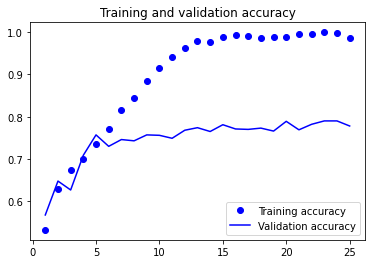

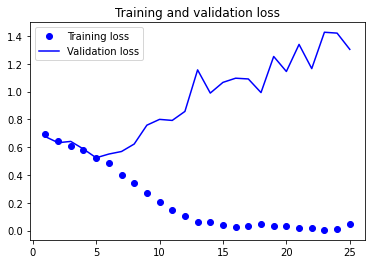

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch_updated_train_size.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.5805 - accuracy: 0.7130
Test accuracy: 0.713


**_The accuracy of the model on the test set is 71.3%_**

As we can see above that we were able to achieve the accuracy of approximately 100% for the training set, but the model didn't perfromed that well for validation and test set.

Now we will use Data Augmentation and Dropout to optimize this network and then look at the acuracies again.

**Using data augmentation and Dropout**

Define a data augmentation stage to add to an image model


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)
     

**Displaying some randomly augmented training images**

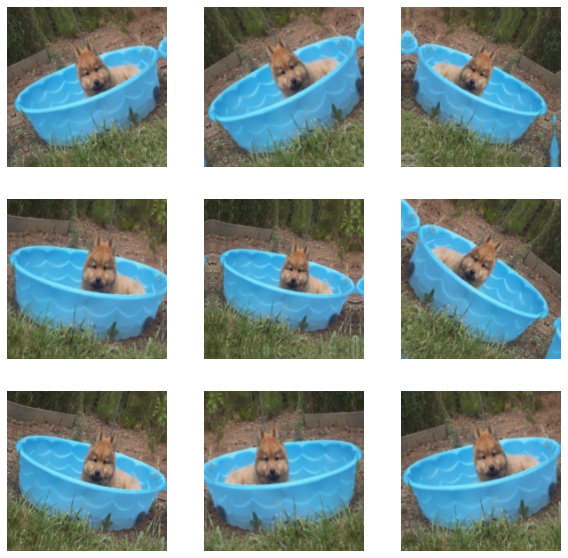

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

## **Model 6: 4 layers, Activation- sigmoid, Optimizer- adam, Loss- binary_crossentropy, Augmentation, Dropout- 0.5**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
     

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_updated_train_size_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=25,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/25


125/125 [==============================] - 30s 204ms/step - loss: 0.6932 - accuracy: 0.5175 - val_loss: 0.6927 - val_accuracy: 0.5290
Epoch 2/25
125/125 [==============================] - 25s 201ms/step - loss: 0.6932 - accuracy: 0.5070 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/25
125/125 [==============================] - 25s 200ms/step - loss: 0.6901 - accuracy: 0.5195 - val_loss: 0.6922 - val_accuracy: 0.5360
Epoch 4/25
125/125 [==============================] - 26s 202ms/step - loss: 0.6881 - accuracy: 0.5303 - val_loss: 0.6883 - val_accuracy: 0.5420
Epoch 5/25
125/125 [==============================] - 25s 200ms/step - loss: 0.6852 - accuracy: 0.5422 - val_loss: 0.6827 - val_accuracy: 0.5540
Epoch 6/25
125/125 [==============================] - 25s 202ms/step - loss: 0.6807 - accuracy: 0.5610 - val_loss: 0.6797 - val_accuracy: 0.5650
Epoch 7/25
125/125 [==============================] - 25s 199ms/step - loss: 0.6727 - accuracy: 0.5755 - val_loss: 0.6413 - val_accuracy: 0.6

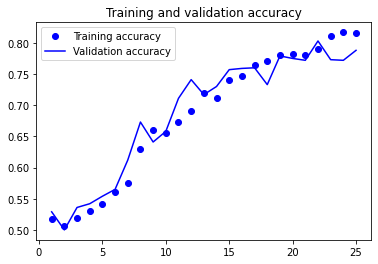

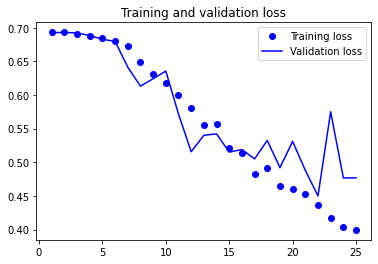

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_updated_train_size_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.4502 - accuracy: 0.7930
Test accuracy: 0.793


**_The accuracy of the model on the test set is 79.3%_**

### **_3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results._**

**I will be using training sample as 1500 to see the performance of the model**

Copying images to training, validation, and test directories

In [16]:
import os, shutil, pathlib

original_dir_3 = pathlib.Path("train")
new_base_dir_3 = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train_3", start_index=0, end_index=1500)
make_subset("validation_3", start_index=1500, end_index=2000)
make_subset("test_3", start_index=2000, end_index=2500)
     

**Data preprocessing**

Using image_dataset_from_directory to read images

In [ ]:
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

**Displaying the shapes of the data and labels yielded by the Dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


## **Model 7: Training set- 1500, Validation and Test set- 500, 4 layers, 32 Neurons, Activation- relu, Optimizer- rmsprop, Loss- binary_crossentropy**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
     

In [ ]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                     

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
     

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_final.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 7s 79ms/step - loss: 0.7011 - accuracy: 0.5150 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 4s 64ms/step - loss: 0.6905 - accuracy: 0.5495 - val_loss: 0.7002 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 5s 77ms/step - loss: 0.6736 - accuracy: 0.5845 - val_loss: 0.6316 - val_accuracy: 0.6410
Epoch 4/20
63/63 [==============================] - 4s 63ms/step - loss: 0.6286 - accuracy: 0.6540 - val_loss: 0.6230 - val_accuracy: 0.6230
Epoch 5/20
63/63 [==============================] - 4s 60ms/step - loss: 0.5914 - accuracy: 0.6690 - val_loss: 0.6478 - val_accuracy: 0.6110
Epoch 6/20
63/63 [==============================] - 5s 77ms/step - loss: 0.5662 - accuracy: 0.6910 - val_loss: 0.6391 - val_accuracy: 0.6350
Epoch 7/20
63/63 [==============================] - 4s 61ms/step - loss: 0.5352 - accuracy: 0.7395 - val_loss: 0.6065 - val_accuracy: 0.6850
Epoch 8/20
63

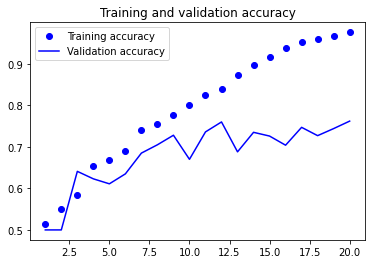

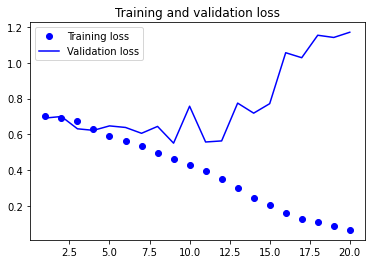

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.5996 - accuracy: 0.6860
Test accuracy: 0.686


**_The accuracy of the model on the test set is 68.6%_**

## **Model 8: 4 layers, Activation- sigmoid, Optimizer- adam, Loss- binary_crossentropy, Augmentation, Dropout- 0.4**

**Using data augmentation and Dropout**

Define a data augmentation stage to add to an image model

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

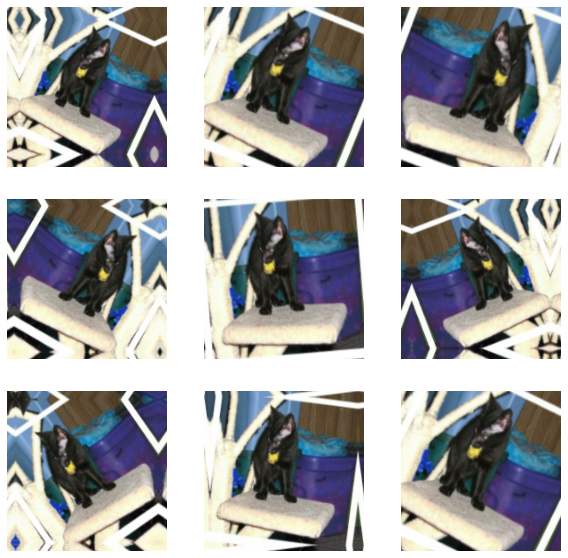

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
     

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_updated_train_size_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20


63/63 [==============================] - 17s 208ms/step - loss: 0.7014 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 13s 205ms/step - loss: 0.6942 - accuracy: 0.5060 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 13s 207ms/step - loss: 0.6926 - accuracy: 0.5250 - val_loss: 0.6927 - val_accuracy: 0.5010
Epoch 4/20
63/63 [==============================] - 13s 210ms/step - loss: 0.6847 - accuracy: 0.5680 - val_loss: 0.6727 - val_accuracy: 0.5770
Epoch 5/20
63/63 [==============================] - 14s 207ms/step - loss: 0.6645 - accuracy: 0.6085 - val_loss: 0.7282 - val_accuracy: 0.5590
Epoch 6/20
63/63 [==============================] - 13s 206ms/step - loss: 0.6313 - accuracy: 0.6420 - val_loss: 0.6572 - val_accuracy: 0.6010
Epoch 7/20
63/63 [==============================] - 13s 208ms/step - loss: 0.6200 - accuracy: 0.6490 - val_loss: 0.6168 - val_accuracy: 0.6600
Epoch 8/20

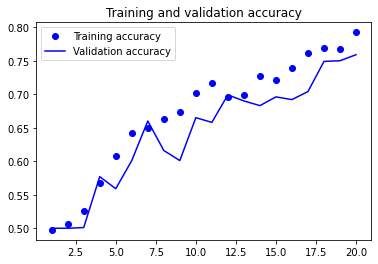

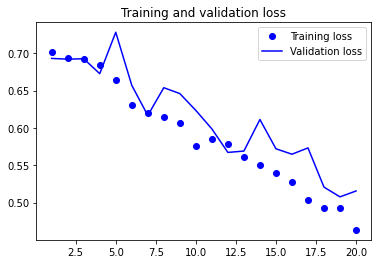

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_updated_train_size_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.5514 - accuracy: 0.7400
Test accuracy: 0.740


**_The accuracy of the model on the test set is 74%_**

## **Training Sample- 2500**

In [16]:
import os, shutil, pathlib

original_dir_3 = pathlib.Path("train")
new_base_dir_3 = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train_3", start_index=0, end_index=2500)
make_subset("validation_3", start_index=2500, end_index=3000)
make_subset("test_3", start_index=3000, end_index=3500)

**Data preprocessing**

Using image_dataset_from_directory to read images



In [17]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train_3",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation_3",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test_3",
    image_size=(180, 180),
    batch_size=32)

Found 5000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [18]:
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
     

In [19]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break
     

(16,)
(16,)
(16,)


In [20]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break
     

(32, 16)
(32, 16)
(32, 16)


In [21]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break
     

(4, 4)
(4, 4)
(4, 4)


In [22]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break
     

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


## **Model 9: 4 layers, Activation- sigmoid, Optimizer- adam, Loss- binary_crossentropy**

In [23]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
     

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [25]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
     

In [26]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
157/157 [==============================] - 22s 61ms/step - loss: 0.6641 - accuracy: 0.5794 - val_loss: 0.6614 - val_accuracy: 0.6280
Epoch 2/30
157/157 [==============================] - 8s 51ms/step - loss: 0.5955 - accuracy: 0.6800 - val_loss: 0.5862 - val_accuracy: 0.6930
Epoch 3/30
157/157 [==============================] - 8s 51ms/step - loss: 0.5609 - accuracy: 0.7094 - val_loss: 0.5767 - val_accuracy: 0.7140
Epoch 4/30
157/157 [==============================] - 9s 53ms/step - loss: 0.5185 - accuracy: 0.7396 - val_loss: 0.5458 - val_accuracy: 0.7310
Epoch 5/30
157/157 [==============================] - 9s 57ms/step - loss: 0.4631 - accuracy: 0.7832 - val_loss: 0.5827 - val_accuracy: 0.7340
Epoch 6/30
157/157 [==============================] - 10s 63ms/step - loss: 0.4215 - accuracy: 0.8042 - val_loss: 0.5421 - val_accuracy: 0.7450
Epoch 7/30
157/157 [==============================] - 9s 56ms/step - loss: 0.3719 - accuracy: 0.8354 - val_loss: 0.5772 - val_accuracy: 0.76

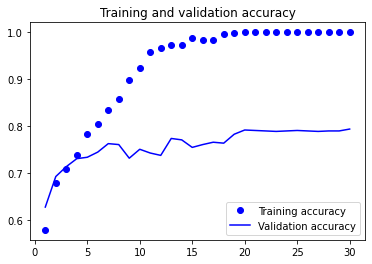

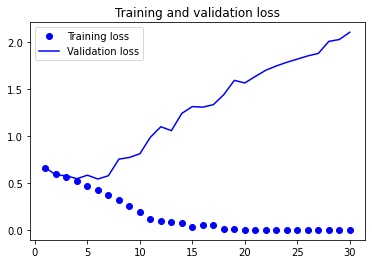

In [27]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()
     

In [28]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 51ms/step - loss: 0.4615 - accuracy: 0.7840
Test accuracy: 0.784


**_The accuracy of the model on the test set is 69.9%_**

## **Model 10: 4 layers, Activation- sigmoid, Optimizer- adam, Loss- binary_crossentropy, Augmentation, Dropout- 0.5**

In [35]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)
     

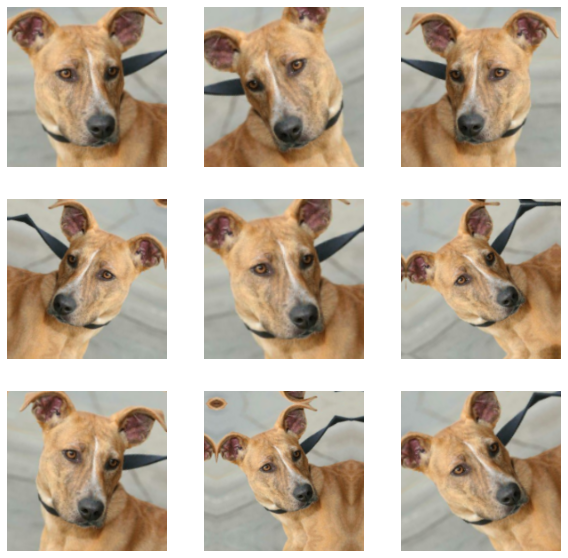

In [36]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
     

In [38]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=35,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/35


157/157 [==============================] - 36s 193ms/step - loss: 0.6866 - accuracy: 0.5366 - val_loss: 0.6670 - val_accuracy: 0.6100
Epoch 2/35
157/157 [==============================] - 30s 192ms/step - loss: 0.6665 - accuracy: 0.6018 - val_loss: 0.6694 - val_accuracy: 0.6040
Epoch 3/35
157/157 [==============================] - 31s 195ms/step - loss: 0.6316 - accuracy: 0.6518 - val_loss: 0.7464 - val_accuracy: 0.6410
Epoch 4/35
157/157 [==============================] - 31s 197ms/step - loss: 0.6130 - accuracy: 0.6602 - val_loss: 0.6004 - val_accuracy: 0.6830
Epoch 5/35
157/157 [==============================] - 31s 198ms/step - loss: 0.5814 - accuracy: 0.6954 - val_loss: 0.5962 - val_accuracy: 0.6890
Epoch 6/35
157/157 [==============================] - 30s 191ms/step - loss: 0.5614 - accuracy: 0.7044 - val_loss: 0.6153 - val_accuracy: 0.7020
Epoch 7/35
157/157 [==============================] - 32s 201ms/step - loss: 0.5410 - accuracy: 0.7338 - val_loss: 0.5898 - val_accuracy: 0.7

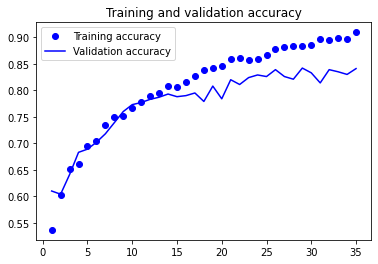

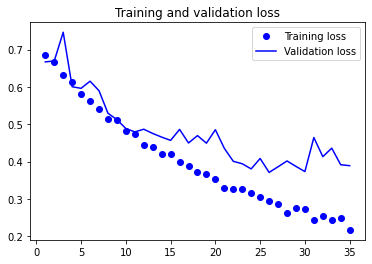

In [39]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()
     


In [40]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 33ms/step - loss: 0.3170 - accuracy: 0.8650
Test accuracy: 0.865


**_The accuracy of the model on the test set is 86.50%**

### **_4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance._**

**Using a pretrained model**

Now we are going to use a pretrained model and see how long does it take to make that model converge to the same dataset and also see how we can further finetune it.

**_Instantiating the VGG16 convolutional base_**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

By glancing at the summary, it is very clear that this is a pretty big model, with almost 14 Million plus parameters.

Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [ ]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)
     

Epoch 1/20
63/63 [==============================] - 2s 14ms/step - loss: 8.7462 - accuracy: 0.9360 - val_loss: 2.1698 - val_accuracy: 0.9760
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 3.4207 - accuracy: 0.9785 - val_loss: 4.5466 - val_accuracy: 0.9730
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.7524 - accuracy: 0.9855 - val_loss: 4.3906 - val_accuracy: 0.9720
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3157 - accuracy: 0.9915 - val_loss: 6.4564 - val_accuracy: 0.9730
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.3562 - accuracy: 0.9960 - val_loss: 4.9841 - val_accuracy: 0.9770
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.8024 - accuracy: 0.9940 - val_loss: 6.3236 - val_accuracy: 0.9720
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2808 - accuracy: 0.9955 - val_loss: 8.9680 - val_accuracy: 0.9650
Epoch 8/20
63/63 [=

**Plotting the results**



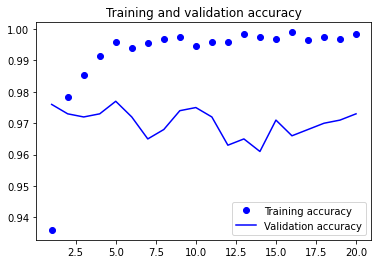

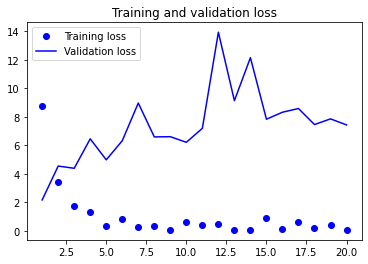

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()
     


We can clearly see how well the pretrained model is working. The training and validation accuracy is moving at a similar pace and just by running for 20 epochs, we were able to get the accuracy of 98%.

### **Feature extraction together with data augmentation**

Now we will use Data Augmentation on this network and see what results do we get.

**Instantiating and freezing the VGG16 convolutional base**



In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False
     

**Printing the list of trainable weights before and after freezing**



In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


This is the number of trainable weights before freezing the conv base: 26

In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))
     

This is the number of trainable weights after freezing the conv base: 0


This is the number of trainable weights after freezing the conv base: 0

**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
     


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10


63/63 [==============================] - 23s 295ms/step - loss: 9.6501 - accuracy: 0.9060 - val_loss: 4.9800 - val_accuracy: 0.9670
Epoch 2/10
63/63 [==============================] - 18s 287ms/step - loss: 6.3481 - accuracy: 0.9520 - val_loss: 5.3874 - val_accuracy: 0.9650
Epoch 3/10
63/63 [==============================] - 19s 296ms/step - loss: 3.3499 - accuracy: 0.9665 - val_loss: 4.6925 - val_accuracy: 0.9720
Epoch 4/10
63/63 [==============================] - 18s 284ms/step - loss: 2.1690 - accuracy: 0.9710 - val_loss: 7.5893 - val_accuracy: 0.9670
Epoch 5/10
63/63 [==============================] - 19s 299ms/step - loss: 2.9651 - accuracy: 0.9705 - val_loss: 4.3799 - val_accuracy: 0.9760
Epoch 6/10
63/63 [==============================] - 20s 317ms/step - loss: 2.0866 - accuracy: 0.9765 - val_loss: 7.5782 - val_accuracy: 0.9670
Epoch 7/10
63/63 [==============================] - 18s 283ms/step - loss: 2.7439 - accuracy: 0.9795 - val_loss: 4.9428 - val_accuracy: 0.9770
Epoch 8/10

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 96ms/step - loss: 5.1589 - accuracy: 0.9740
Test accuracy: 0.974


We can see clearly that Data Augmentation wasn't able to improve our results significantly.

So we will try some other technique.

We will fine tune our model by freezing all the layers except for the last 4 and then check our model's accuracy.

##**Fine-tuning a pretrained model 1**

In [ ]:
conv_base.summary()
     

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

Here we are freezing all the layers except for the first 2 layers, which are called the Convolution Base. Convolution Base are the nodes. The second part to this is the Classifier, which sits on the top of the convolution base.

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10


63/63 [==============================] - 25s 322ms/step - loss: 0.2227 - accuracy: 0.9925 - val_loss: 3.2190 - val_accuracy: 0.9740
Epoch 2/10
63/63 [==============================] - 21s 337ms/step - loss: 0.2203 - accuracy: 0.9935 - val_loss: 1.9899 - val_accuracy: 0.9810
Epoch 3/10
63/63 [==============================] - 19s 299ms/step - loss: 0.3114 - accuracy: 0.9940 - val_loss: 2.4126 - val_accuracy: 0.9790
Epoch 4/10
63/63 [==============================] - 20s 313ms/step - loss: 0.2817 - accuracy: 0.9930 - val_loss: 1.8049 - val_accuracy: 0.9810
Epoch 5/10
63/63 [==============================] - 19s 300ms/step - loss: 0.1894 - accuracy: 0.9915 - val_loss: 1.8622 - val_accuracy: 0.9810
Epoch 6/10
63/63 [==============================] - 19s 300ms/step - loss: 0.1634 - accuracy: 0.9945 - val_loss: 1.9211 - val_accuracy: 0.9800
Epoch 7/10
63/63 [==============================] - 20s 311ms/step - loss: 0.1818 - accuracy: 0.9960 - val_loss: 2.0671 - val_accuracy: 0.9830
Epoch 8/10

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 95ms/step - loss: 1.8965 - accuracy: 0.9770
Test accuracy: 0.977


## **Observation of Accuracy on the test set**

The accuracies of Model 10 and Model 11 is the highest among all the other models.

1. Model 10 was built using 4 layers, 2500 training sample, sigmoid as the activation function, adam as the optimizer, binary crossentropy as the loss function, data augmentation and dropout rate of 0.5

2. Model 11 was built using a pretained model, sigmoid as the activation function, rmsprop as the optimizer, binary crossentropy as the loss function, data augmentation and dropout rate of 0.5

## **Observation of Loss value on the test set**

The loss value of Model 10 and Model 11 is the least from among all the other models.

1. Model 10 was built using 4 layers, 2500 training sample, sigmoid as the activation function, adam as the optimizer, binary crossentropy as the loss function, data augmentation and dropout rate of 0.5.

2. Model 11 was built using a pretained model, sigmoid as the activation function, rmsprop as the optimizer, binary crossentropy as the loss function, data augmentation and dropout rate of 0.5.


### **Model 10 and Model 11 results in the highest accuracy as well as the least loss value. Choosing the best model depends on either highest accuracy or least loss value.**

Both the models can be considered as best models because these models are completely different from each other. Model 10 was built from scratch, whereas Model 11 is a built using a pre-trained model.

Therefore, we will go with the models with highest accuracies, which will be **Model 10 with 86.50%** and **Model 11 with 97.70%.**

